In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to dataset directories
train_dir = '/content/drive/MyDrive/Object Recognision/Dataset/training_Set'
test_dir = '/content/drive/MyDrive/Object Recognision/Dataset/test_Set'

# Image dimensions
img_width, img_height = 150, 150
batch_size = 32

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,         # Normalize pixel values to [0, 1]
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True     # Randomly flip images
)

# Only rescaling for the test set
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generate batches of augmented data for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),  # Resize images to a fixed size
    batch_size=batch_size,
    class_mode='binary'                  # Binary classification (cats vs. dogs)
)

# Generate batches of data for validation/testing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Display class indices
print("Class indices:", train_generator.class_indices)


Found 1606 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Class indices: {'Cat': 0, 'Dog': 1}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=25,  # You can increase epochs if needed
    verbose=1
)
# Save the model
model.save('cat_dog_classifier.h5')
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,377 (18.42 MB)

 Trainable params: 4,828,929 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.5744 - loss: 1.1107 - val_accuracy: 0.5052 - val_loss: 1.3866
Epoch 2/25
 1/50 ━━━━━━━━━━━━━━━━━━━━ 2:11 3s/step - accuracy: 0.5312 - loss: 0.8642

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 371ms/step - accuracy: 0.5312 - loss: 0.8642 - val_accuracy: 0.3750 - val_loss: 1.6730
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.6880 - loss: 0.6033 - val_accuracy: 0.5026 - val_loss: 1.8945
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6562 - loss: 0.6847 - val_accuracy: 0.4375 - val_loss: 2.2187
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.6958 - loss: 0.5726 - val_accuracy: 0.5026 - val_loss: 3.1655
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6875 - loss: 0.6417 - val_accuracy: 0.4375 - val_loss: 3.7033
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.7273 - loss: 0.5240 - val_accuracy: 0.4948 - val_loss: 4.8950
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6667 - loss: 0.5860 - val_accuracy: 0.6250 - val_loss: 3.7799
Epoch 9/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.7540 - loss: 0.5067 - val_accuracy: 0.5052 - val_loss: 3.2

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 637ms/step - accuracy: 0.7349 - loss: 0.5657
Test Accuracy: 75.75%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step


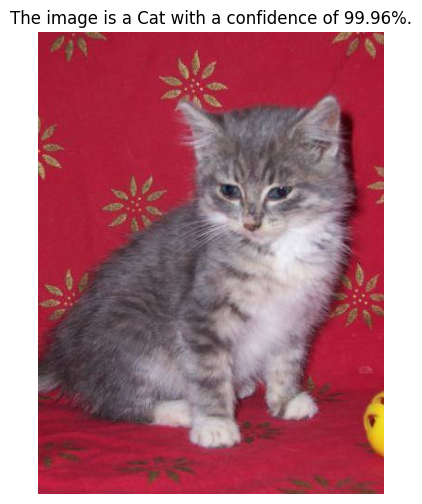

The image is a Cat with a confidence of 99.96%.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/Object Recognision/cat_dog_classifier.h5')  # Replace with your saved model file name

# Function to preprocess, predict, and display the image
def predict_image(img_path):
    """
    Predicts the class of the image, displays it, and prints the result.
    Args:
        img_path (str): Path to the image file.
    Returns:
        None
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))  # Resize to match model input
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values to [0, 1]

    # Predict using the model
    prediction = model.predict(img_array)

    # Interpret the prediction
    if prediction[0][0] > 0.5:
        result = f"The image is a Dog with a confidence of {prediction[0][0] * 100:.2f}%."
    else:
        result = f"The image is a Cat with a confidence of {(1 - prediction[0][0]) * 100:.2f}%."

    # Display the image with the result
    plt.figure(figsize=(6, 6))
    plt.imshow(image.load_img(img_path))  # Display the original image
    plt.title(result)  # Add the prediction result as the title
    plt.axis('off')  # Remove axes for better visualization
    plt.show()

    # Print the result in the console
    print(result)

# Example usage
img_path = '/content/drive/MyDrive/Object Recognision/Dataset/test_Set/Cat/cat (110).jpg'  # Replace with the path to your test image
predict_image(img_path)



Found 400 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 688ms/step


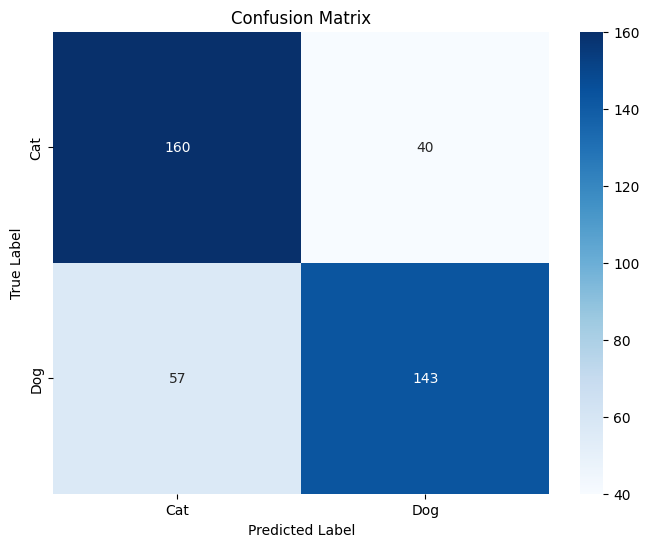

Classification Report:
               precision    recall  f1-score   support

         Cat       0.74      0.80      0.77       200
         Dog       0.78      0.71      0.75       200

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400

Accuracy: 0.76
F1 Score: 0.75


<ipython-input-9-3d38337e232b>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


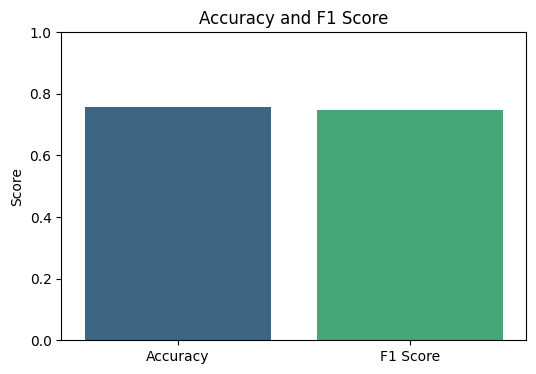

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Load the trained model
model = load_model('cat_dog_classifier.h5')  # Replace with your saved model file name

# Load the test dataset
test_dir = '/content/drive/MyDrive/Object Recognision/Dataset/test_Set'  # Replace with your test dataset directory
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize the test images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Important to keep the order for confusion matrix
)

# Predict the classes for the test dataset
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to binary classes
true_classes = test_generator.classes  # True labels
class_labels = list(test_generator.class_indices.keys())  # ['Cat', 'Dog']

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

# Compute accuracy and F1 score
accuracy = accuracy_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot accuracy and F1 score in a bar chart
metrics = ['Accuracy', 'F1 Score']
values = [accuracy, f1]

plt.figure(figsize=(6, 4))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.title('Accuracy and F1 Score')
plt.ylabel('Score')
plt.show()
